# House Sales in Washington, USA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introduction
Leading real estate firm in Washington, USA, Chants wants to change the buying and selling of real estate property using complex algorithms for predicting house prices. The firm acknowledges how vital it is to calculate residential property values correctly in order to make wise investment choices, maximize rewards and reduce risks.
However, the current approaches of figuring out property prices sometimes rely on subjective evaluations or sparse data sources, creating uncertainties and substantial monetary losses. By using cutting-edge machine learning techniques and in-depth data analytics strategies to build a reliable predictive model, Chants aims to overcome this difficulty.


## Problem Statement
The main goal of this project is to create a machine learning algorithm that can predict the value of real estate with accuracy using a variety of important variables, such as number of bedrooms, bathrooms, floors, and property size among other variables. Chants strives to offer its clients accurate and data-driven property valuation estimations by using sophisticated regression models and structured data sources

## Import Libraries

In [ ]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Import Data set

In [ ]:
#import data set
df = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')

In [ ]:
# view loaded data set
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Meaning of columns in the data set

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## 1. Exploratory Data Analysis

### Data Exploration

In [ ]:
# print shape of data set
df.shape

(21613, 21)

In [ ]:
# check data types of columns in data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# check for missing data in columns
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df_numeric = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 
                 'sqft_lot', 'floors','waterfront', 'view', 'condition', 
                 'grade', 'sqft_above','sqft_basement', 'yr_built', 
                 'yr_renovated', 'sqft_living15','sqft_lot15']]

In [ ]:
# check for duplicated rows
duplicated = df.duplicated().sum()
print('The number of duplicated rows are: {}'.format(duplicated))

The number of duplicated rows are: 0


In [ ]:
# check the value counts for discrete variables
for column in df[['bedrooms', 'bathrooms', 'view', 'floors', 'condition', 'grade']]:
  columnseriesobj = df[column]
  print('unique values for {} : {}'.format(column,columnseriesobj.unique()))

unique values for bedrooms : [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
unique values for bathrooms : [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
unique values for view : [0 3 4 2 1]
unique values for floors : [1.  2.  1.5 3.  2.5 3.5]
unique values for condition : [3 5 4 1 2]
unique values for grade : [ 7  6  8 11  9  5 10 12  4  3 13  1]


In [ ]:
# round up the bathrooms and floors features to their nearest whole numbers.
for column in df[['bathrooms', 'floors']]:
  df[column] = df[column].round(0).astype('int64')

In [ ]:
# function to detect the outliers
def outlier_percent(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3-Q1
  minimum = Q1 - (1.5 * IQR)
  maximum = Q3 + (1.5 * IQR)
  final_min = data < minimum
  final_max = data > maximum
  num_outliers = np.sum((data < minimum) | (data > maximum))
  num_total = data.count()
  return (num_outliers/num_total) * 100

In [ ]:
# looping through the data set to identify the outliers
for column in df_numeric.columns:
    data = df_numeric[column]
    percent = round(outlier_percent(data), 2)
    print('Outliers in {}: {}%'.format(column, percent))

Outliers in price: 5.3%
Outliers in bedrooms: 2.53%
Outliers in bathrooms: 2.64%
Outliers in sqft_living: 2.65%
Outliers in sqft_lot: 11.22%
Outliers in floors: 0.0%
Outliers in waterfront: 0.75%
Outliers in view: 9.83%
Outliers in condition: 0.14%
Outliers in grade: 8.84%
Outliers in sqft_above: 2.83%
Outliers in sqft_basement: 2.29%
Outliers in yr_built: 0.0%
Outliers in yr_renovated: 4.23%
Outliers in sqft_living15: 2.52%
Outliers in sqft_lot15: 10.15%


<Axes: title={'center': 'Outlier Detection'}>

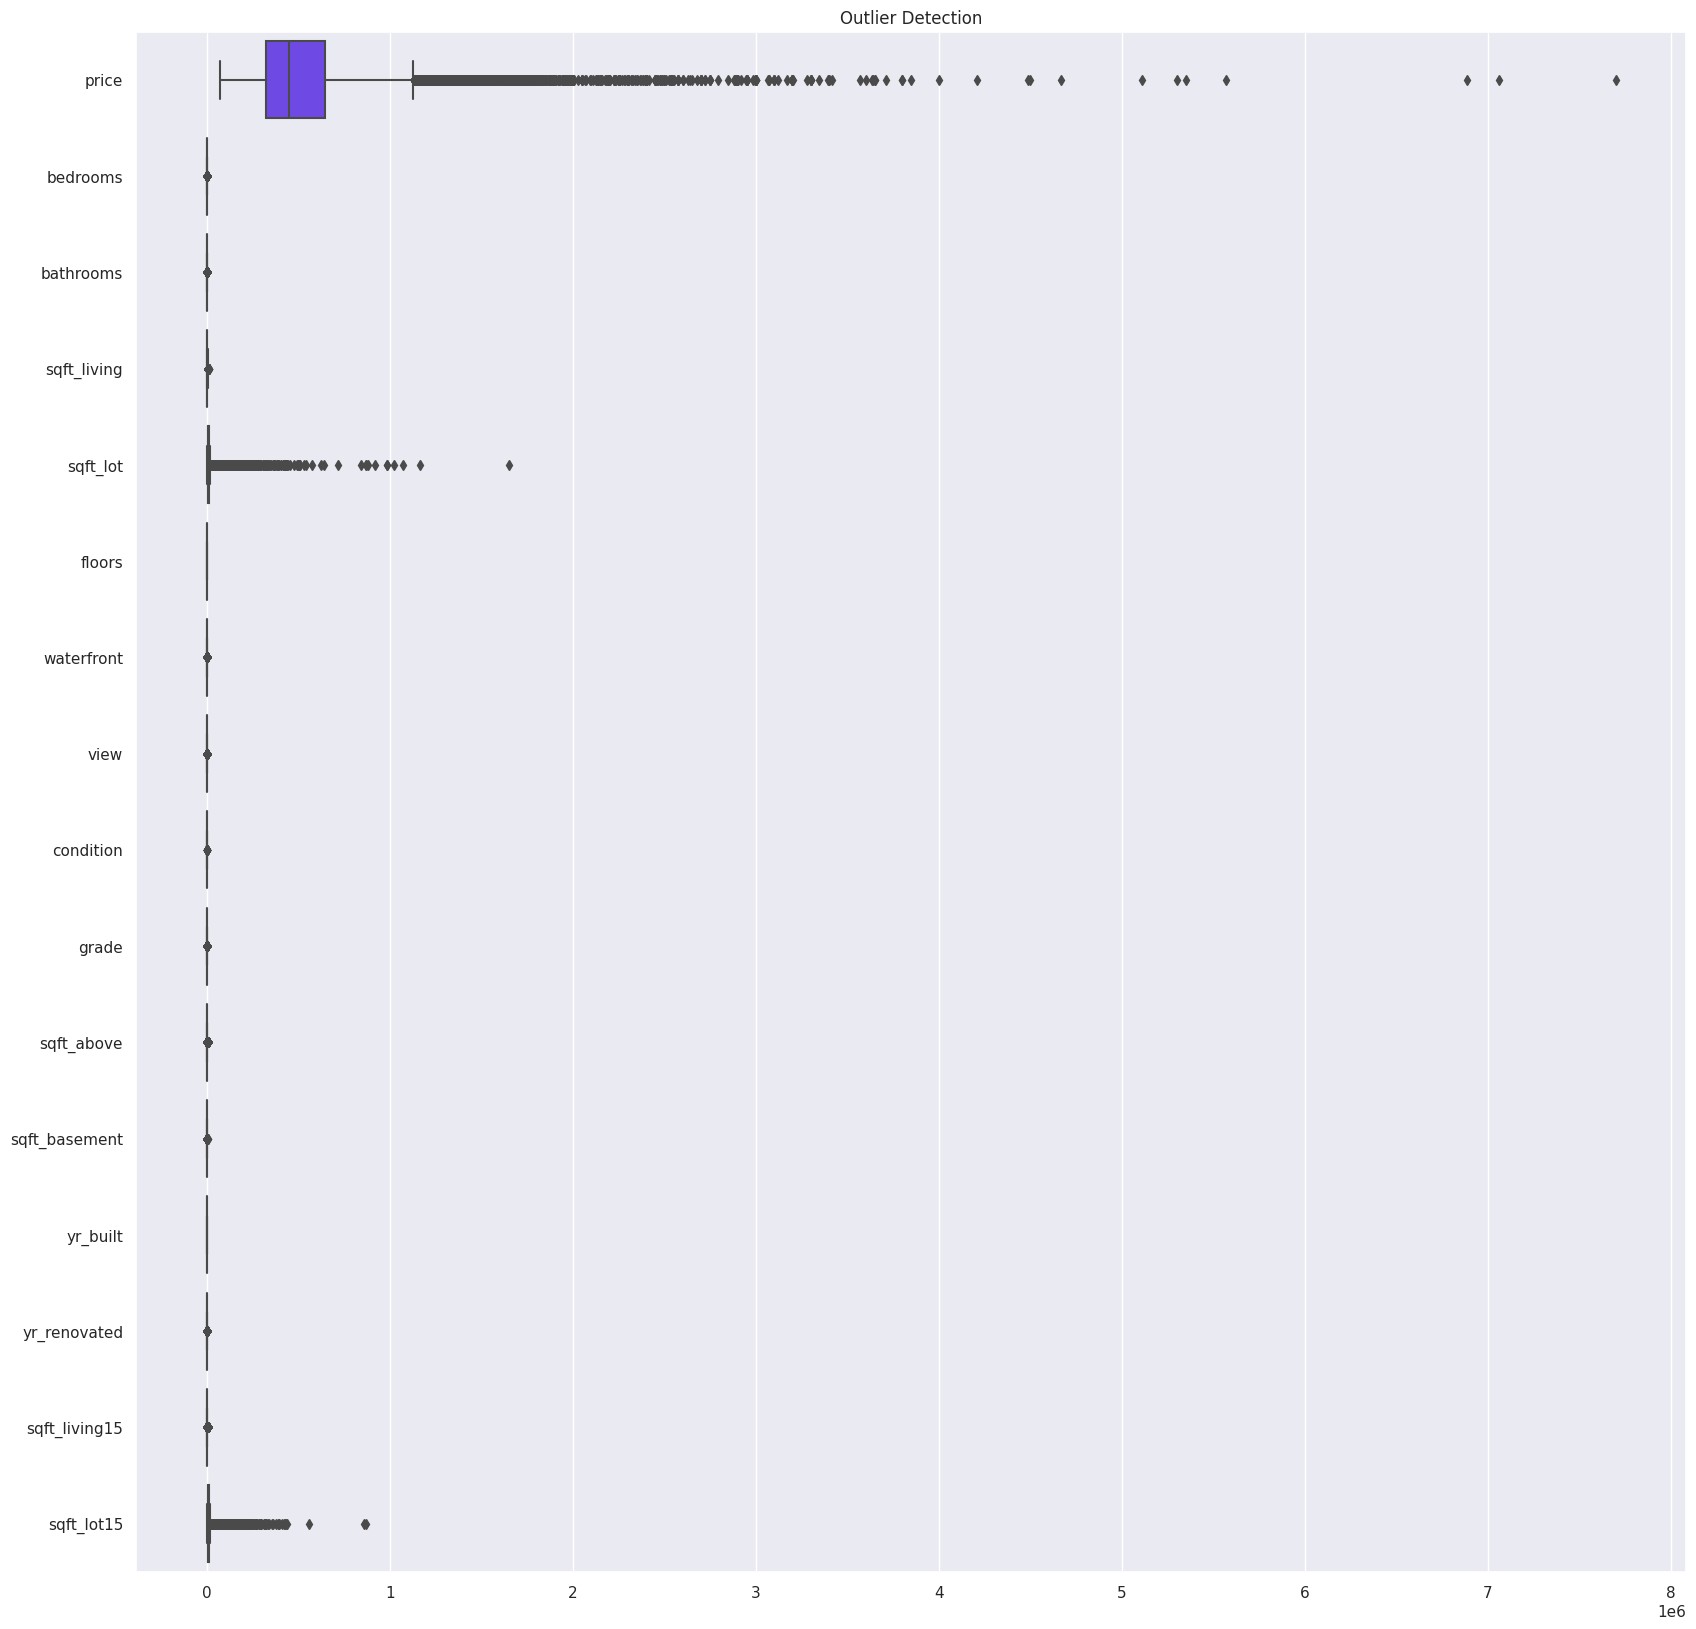

In [ ]:
# confirm the ratio of outliers with box plots
plt.figure(figsize= (20,20))
plt.title('Outlier Detection')
sns.boxplot(data=df_numeric,palette='rainbow',orient='h')

In [ ]:
# remove outliers in selected columns
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['price']))
df_z = df[(z_scores < 3)]  # DataFrame after removing outliers

z_scores = np.abs(stats.zscore(df['sqft_lot']))
df_z = df[(z_scores < 3)]  # DataFrame after removing outliers

z_scores = np.abs(stats.zscore(df['sqft_lot15']))
df_z = df[(z_scores < 3)]  # DataFrame after removing outliers

In [ ]:
# check shape of the data set
df_z.shape

(21250, 21)

### Descriptive Statistics

In [ ]:
# check central and variation measures
df_z.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.125000e+04,2.125000e+04,21250.000000,21250.000000,21250.000000,2.125000e+04,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000
mean,4.620913e+09,5.386076e+05,3.372235,2.054494,2068.295671,1.194139e+04,1.533976,0.007529,0.229694,3.410682,7.649082,1776.391671,291.904000,1970.806965,84.529224,98078.515576,47.561522,-122.216890,1978.256424,9798.824424
std,2.874559e+09,3.671148e+05,0.930894,0.751765,904.753203,2.679610e+04,0.555455,0.086447,0.758836,0.651348,1.167634,814.660762,440.756592,29.450057,401.968321,53.663207,0.137615,0.138316,680.262728,10169.605488
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,460.000000,651.000000
25%,2.144800e+09,3.200000e+05,3.000000,2.000000,1420.000000,5.003250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.474425,-122.329000,1480.000000,5080.000000
50%,3.975400e+09,4.500000e+05,3.000000,2.000000,1900.000000,7.545500e+03,2.000000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1974.000000,0.000000,98067.500000,47.573100,-122.235000,1830.000000,7560.000000
75%,7.345150e+09,6.410000e+05,4.000000,2.000000,2540.000000,1.040000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,560.000000,1997.000000,0.000000,98118.000000,47.678500,-122.130000,2350.000000,9926.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.164794e+06,4.000000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,94663.000000


### Data Visualization

#### Univariate Analysis

(array([  25.,  756., 3628., 4204., 3644., 2768., 2000.]),
 array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]),
 <BarContainer object of 7 artists>)

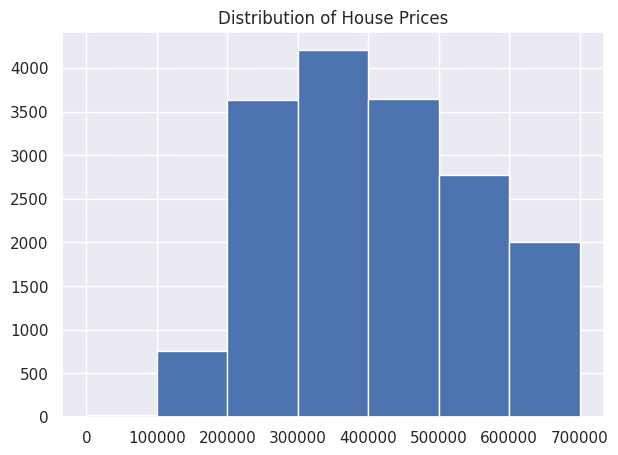

In [ ]:
# visualize the distribution of house prices in kings county
x = df_z['price']
plt.figure(figsize=(7,5))
plt.title('Distribution of House Prices')
plt.hist(x, bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000])

In [ ]:
# plot barchart to view count of bedrooms, bathrooms, grade and condition
def countplot(data, fig):
  plt.subplot(4,2,fig)
  sns.countplot(data = df, x = data, color = 'blue')
  plt.title(data+ ' count')

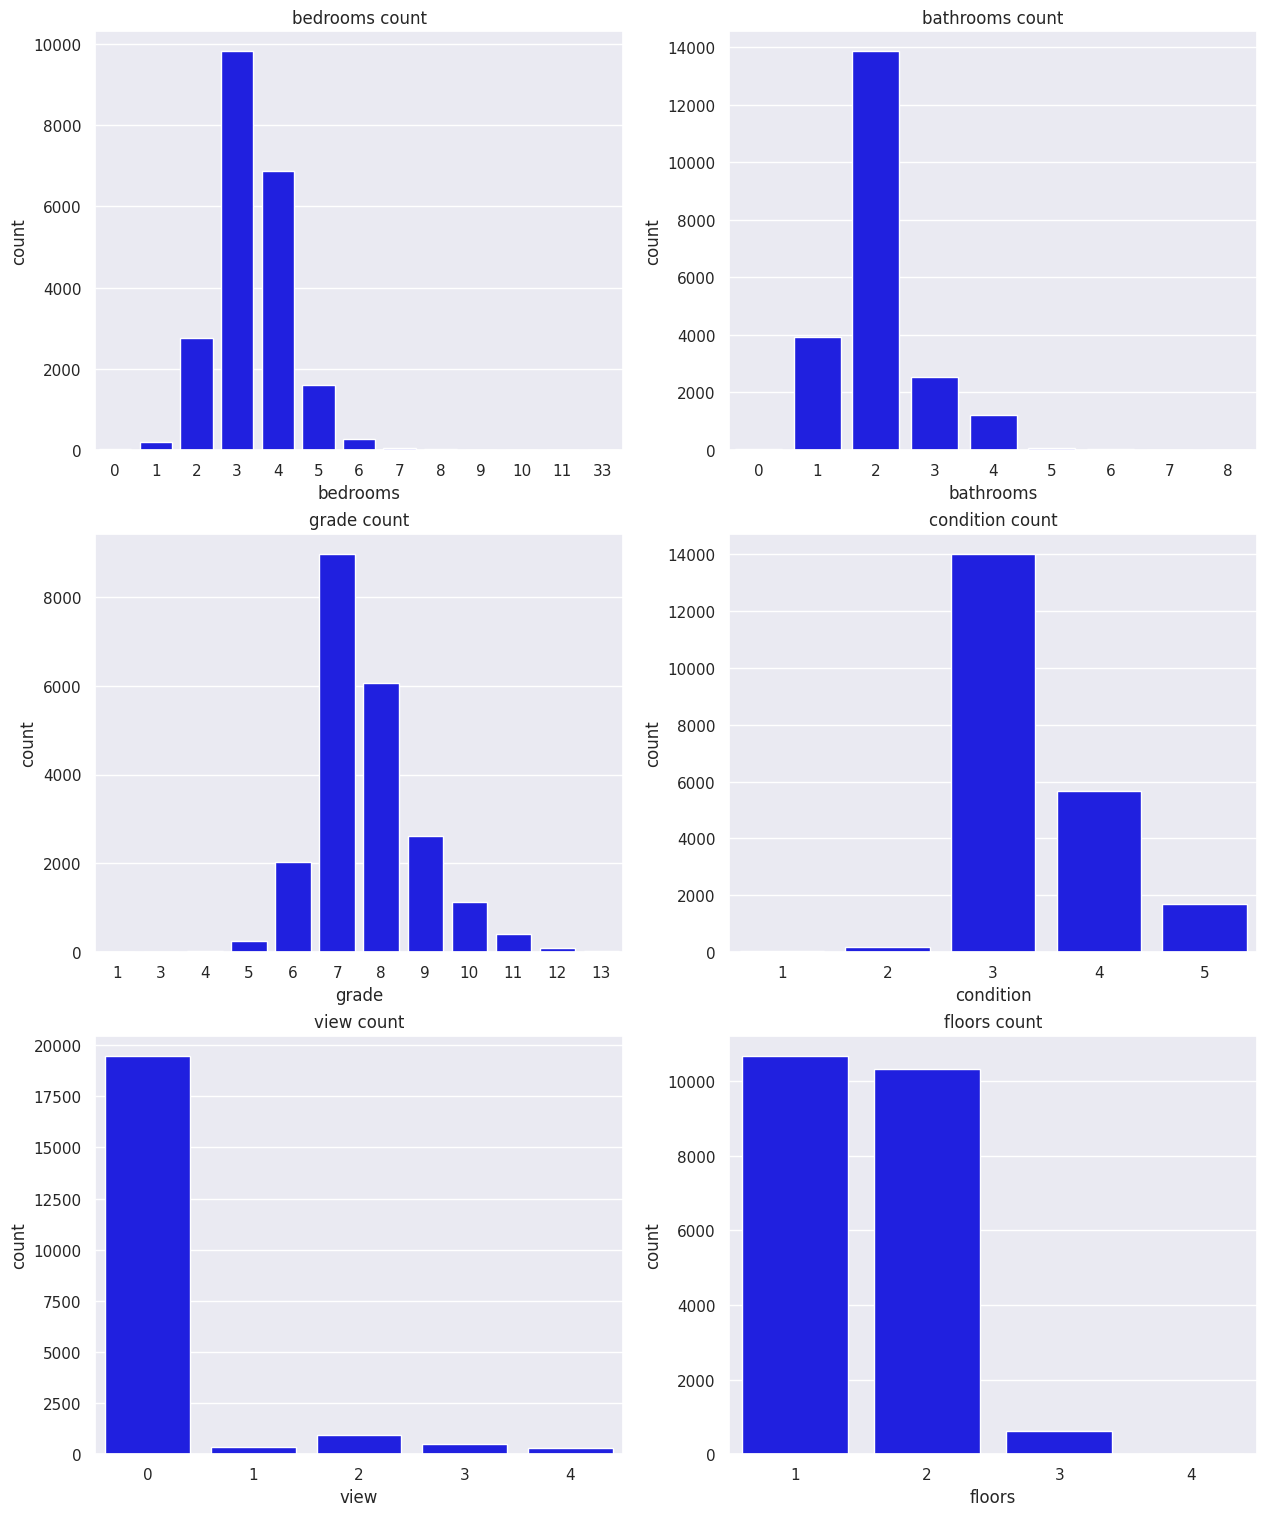

In [ ]:
plt.figure(figsize=(15,25))
countplot('bedrooms', 1)
countplot('bathrooms', 2)
countplot('grade', 3)
countplot('condition', 4)
countplot('view', 5)
countplot('floors', 6)

In [ ]:
def histplot(data, fig, bins = None):
  x = df[data]
  plt.subplot(4,2,fig)
  if bins is not None:
    plt.hist(x, bins=bins)
  else:
    plt.hist(x)
  plt.title(data+ ' histogram')

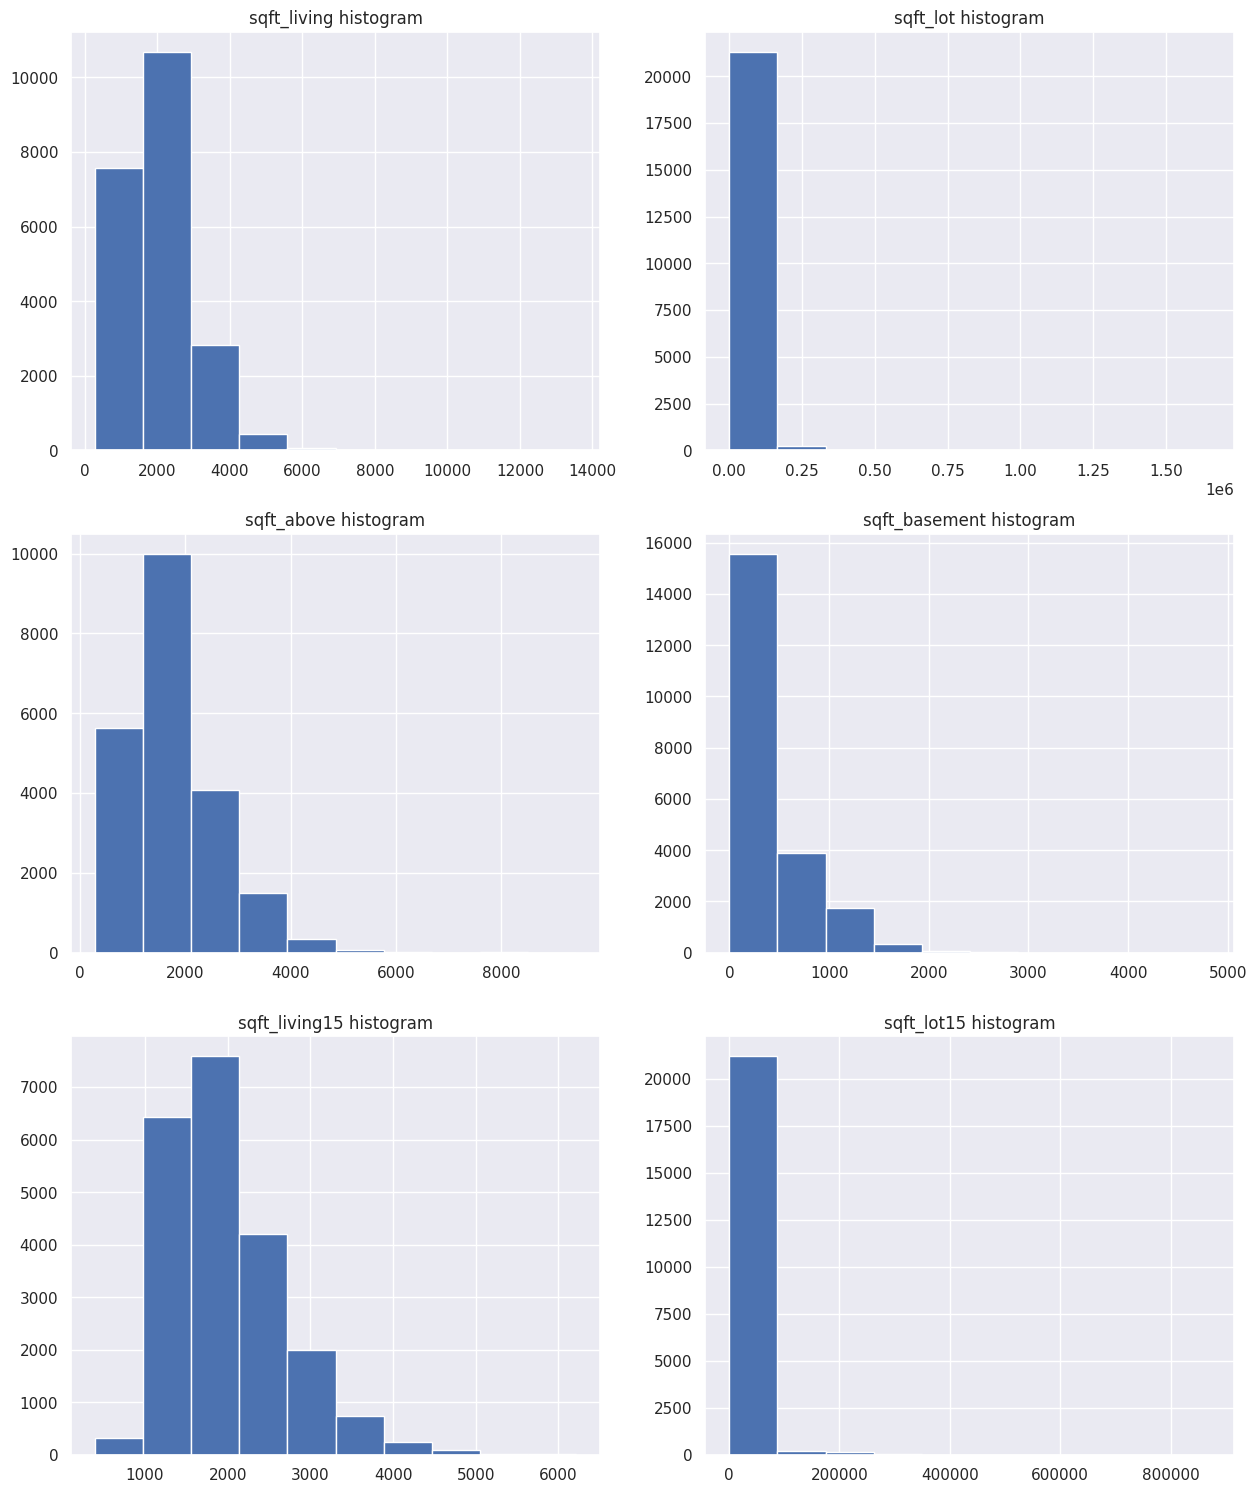

In [ ]:
plt.figure(figsize=(15,25))

histplot('sqft_living', 1)
histplot('sqft_lot', 2)
histplot('sqft_above', 3)
histplot('sqft_basement', 4)
histplot('sqft_living15', 5)
histplot('sqft_lot15', 6)

Text(0.5, 1.0, 'Houses Built by Decade')

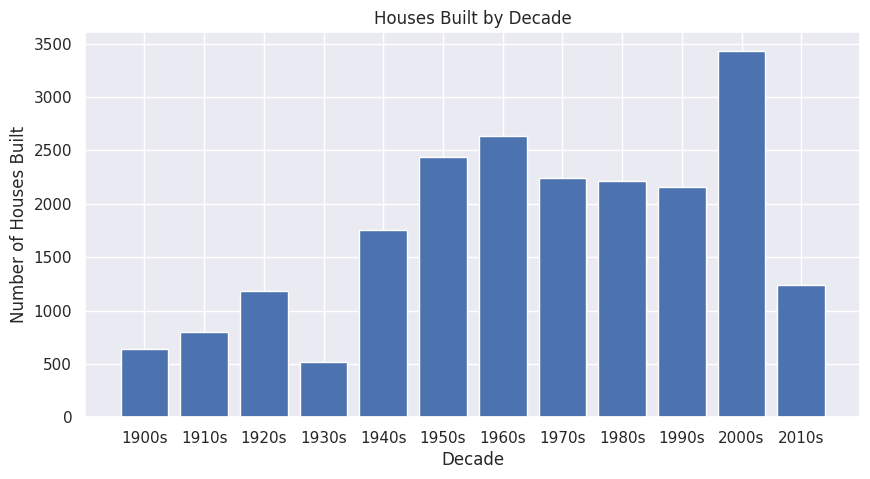

In [ ]:
# group years by decade
house_counts = df_z['yr_built'].apply(lambda x: str(x)[:3] + "0s").value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.bar(house_counts.index, house_counts.values)
plt.xlabel('Decade')
plt.ylabel('Number of Houses Built')
plt.title('Houses Built by Decade')

#### Bivariate Analysis

In [ ]:
# boxplot to view the relationship between prices and other variables
def boxTwo(data, fig):
  plt.subplot(4, 2, fig)
  sns.boxplot(x = data, y = df_z['price'], data = df_z)
  plt.title(data+ ' vs price')

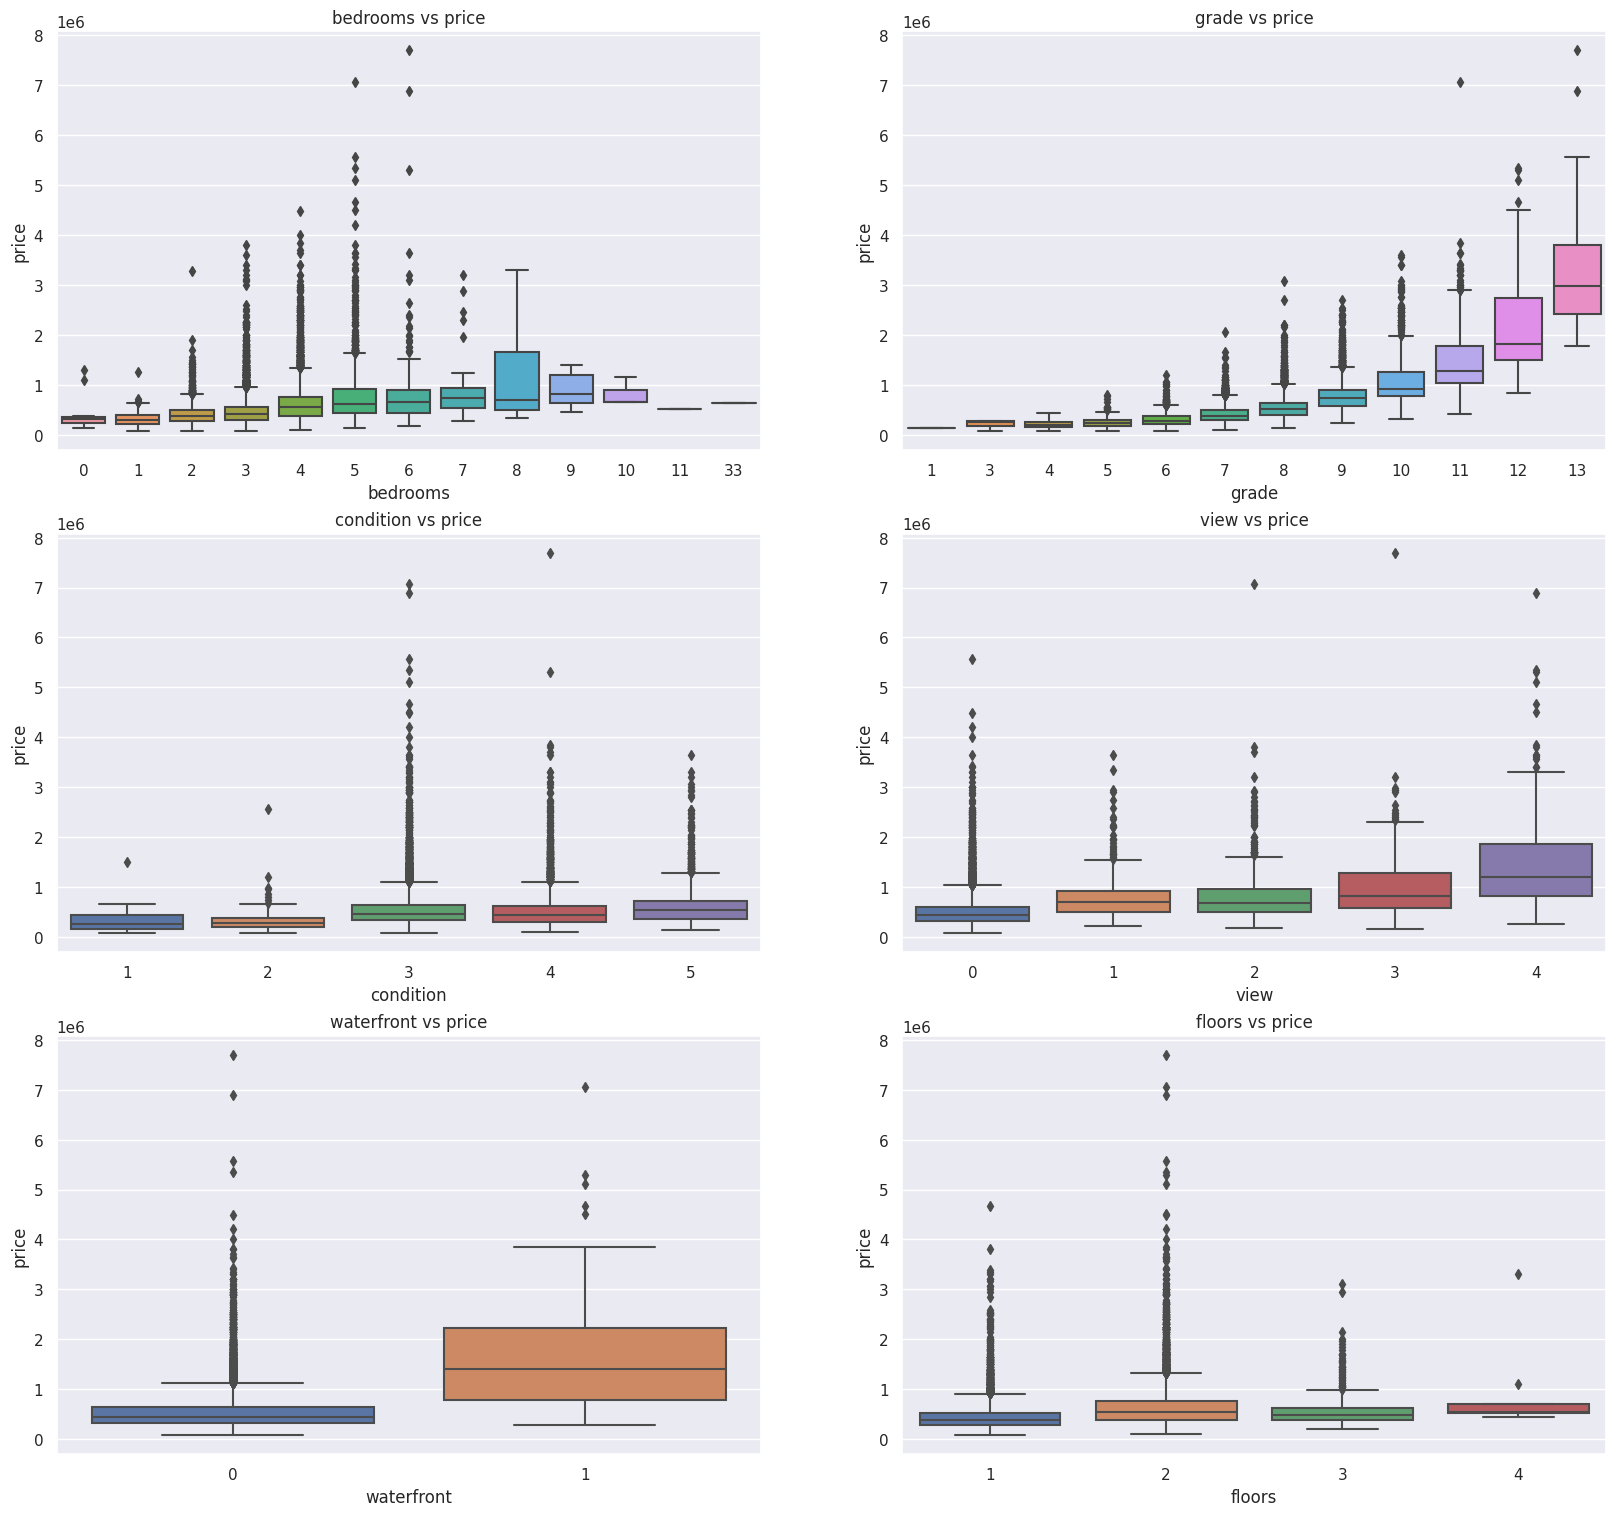

In [ ]:
plt.figure(figsize=(20,25))
boxTwo('bedrooms', 1)
boxTwo('grade', 2)
boxTwo('condition', 3)
boxTwo('view', 4)
boxTwo('waterfront',5)
boxTwo('floors', 6)

In [ ]:
# scatter plot to view the relationship between prices and other variables
def pairs(x, fig):
  plt.subplot(4, 2, fig)
  plt.scatter(df_z[x], df_z['price'])
  plt.title(x+ ' vs price')
  plt.xlabel(x)
  plt.ylabel('price')

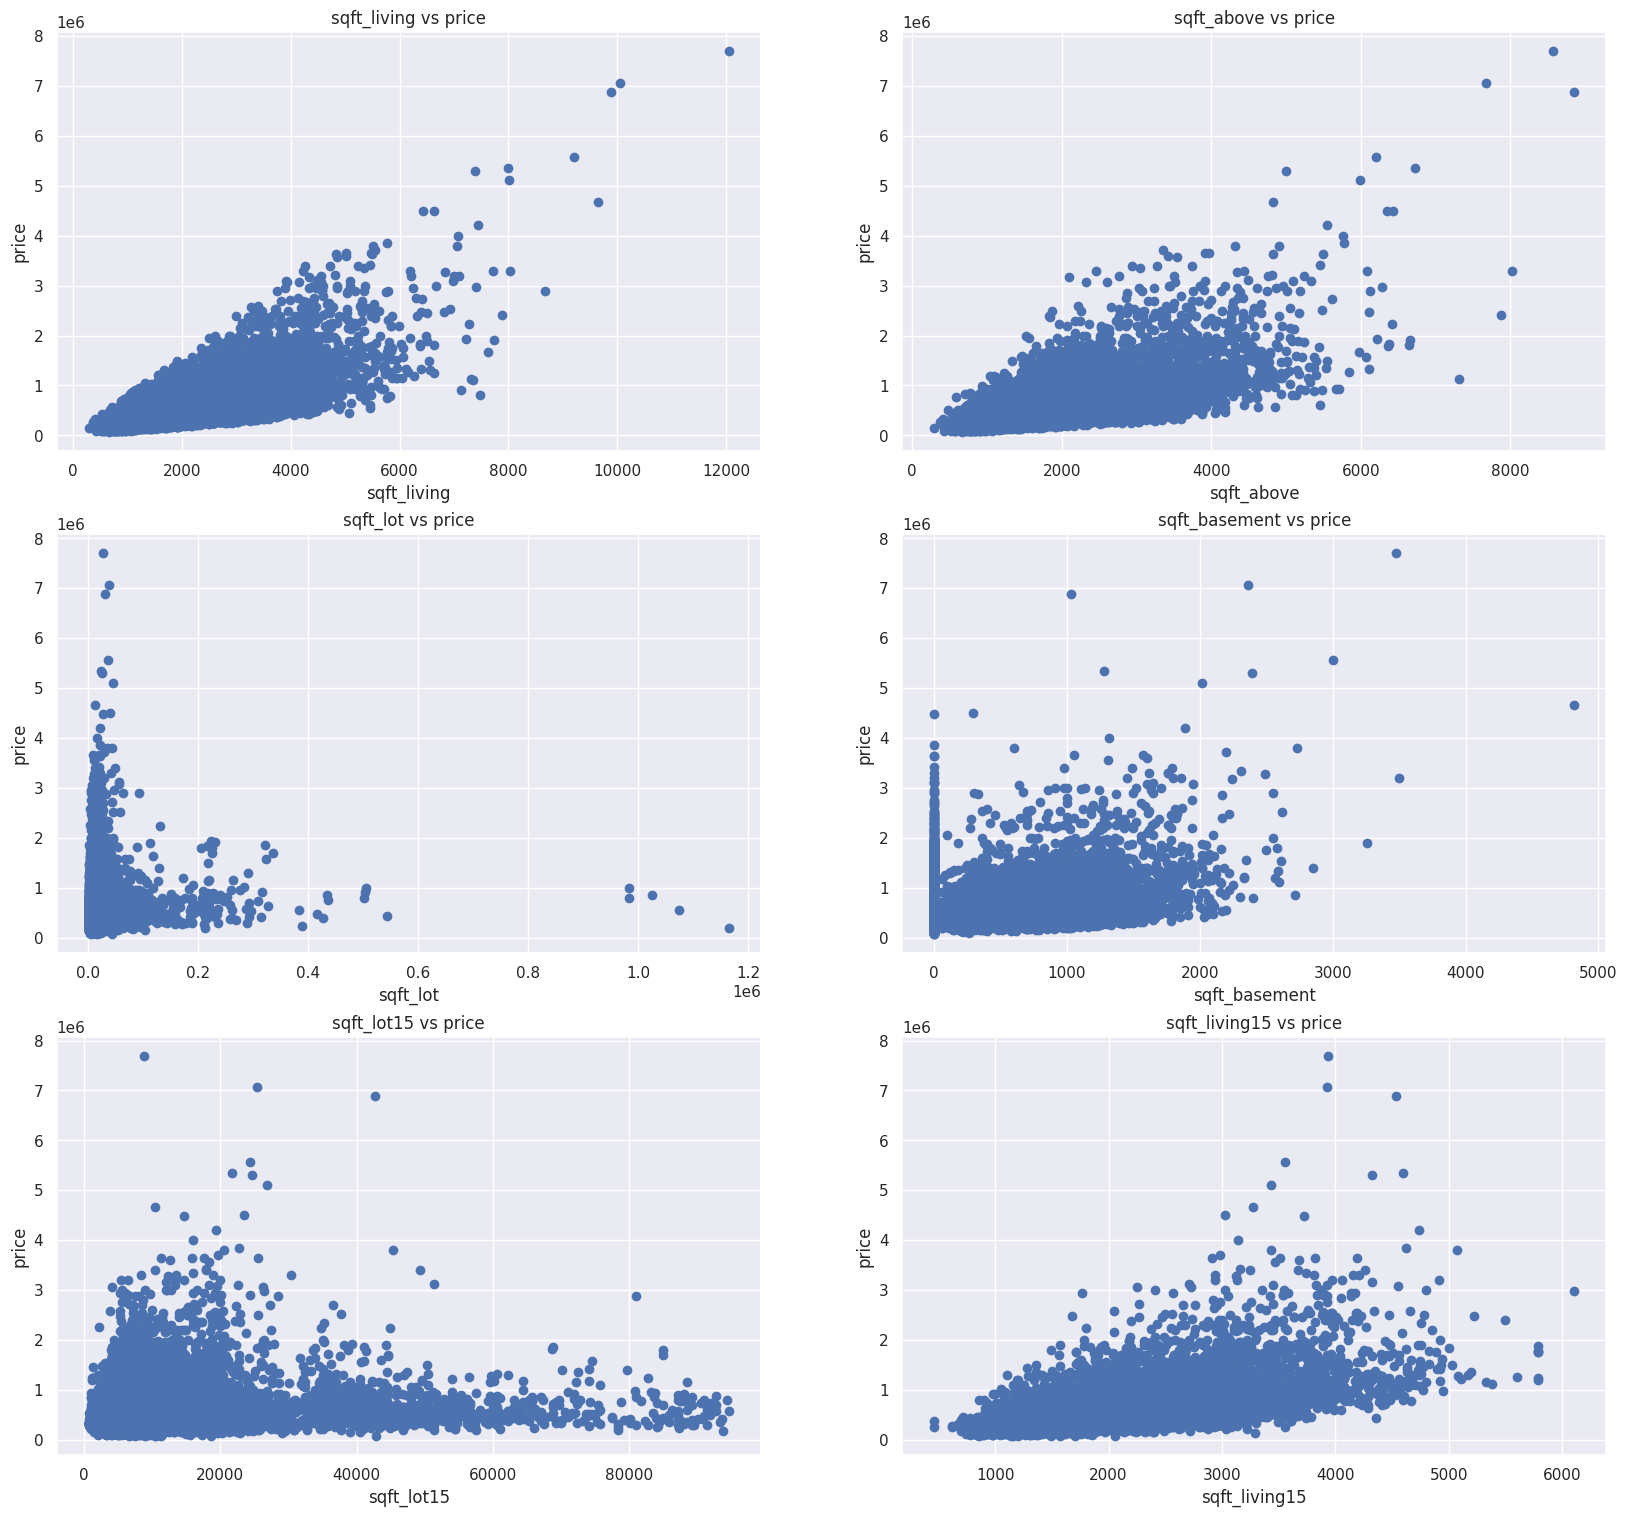

In [ ]:
plt.figure(figsize=(20,25))

pairs('sqft_living', 1)
pairs('sqft_above', 2)
pairs('sqft_lot', 3)
pairs('sqft_basement', 4)
pairs('sqft_lot15', 5)
pairs('sqft_living15', 6)

#### Multivariate Analysis

In [ ]:
df_numeric_z = df_z[['price', 'bedrooms', 'bathrooms', 'sqft_living', 
                 'sqft_lot', 'floors','waterfront', 'view', 'condition', 
                 'grade', 'sqft_above','sqft_basement', 'yr_built', 
                 'yr_renovated', 'sqft_living15','sqft_lot15']]

Text(0.5, 1.0, 'HeatMap for Variables')

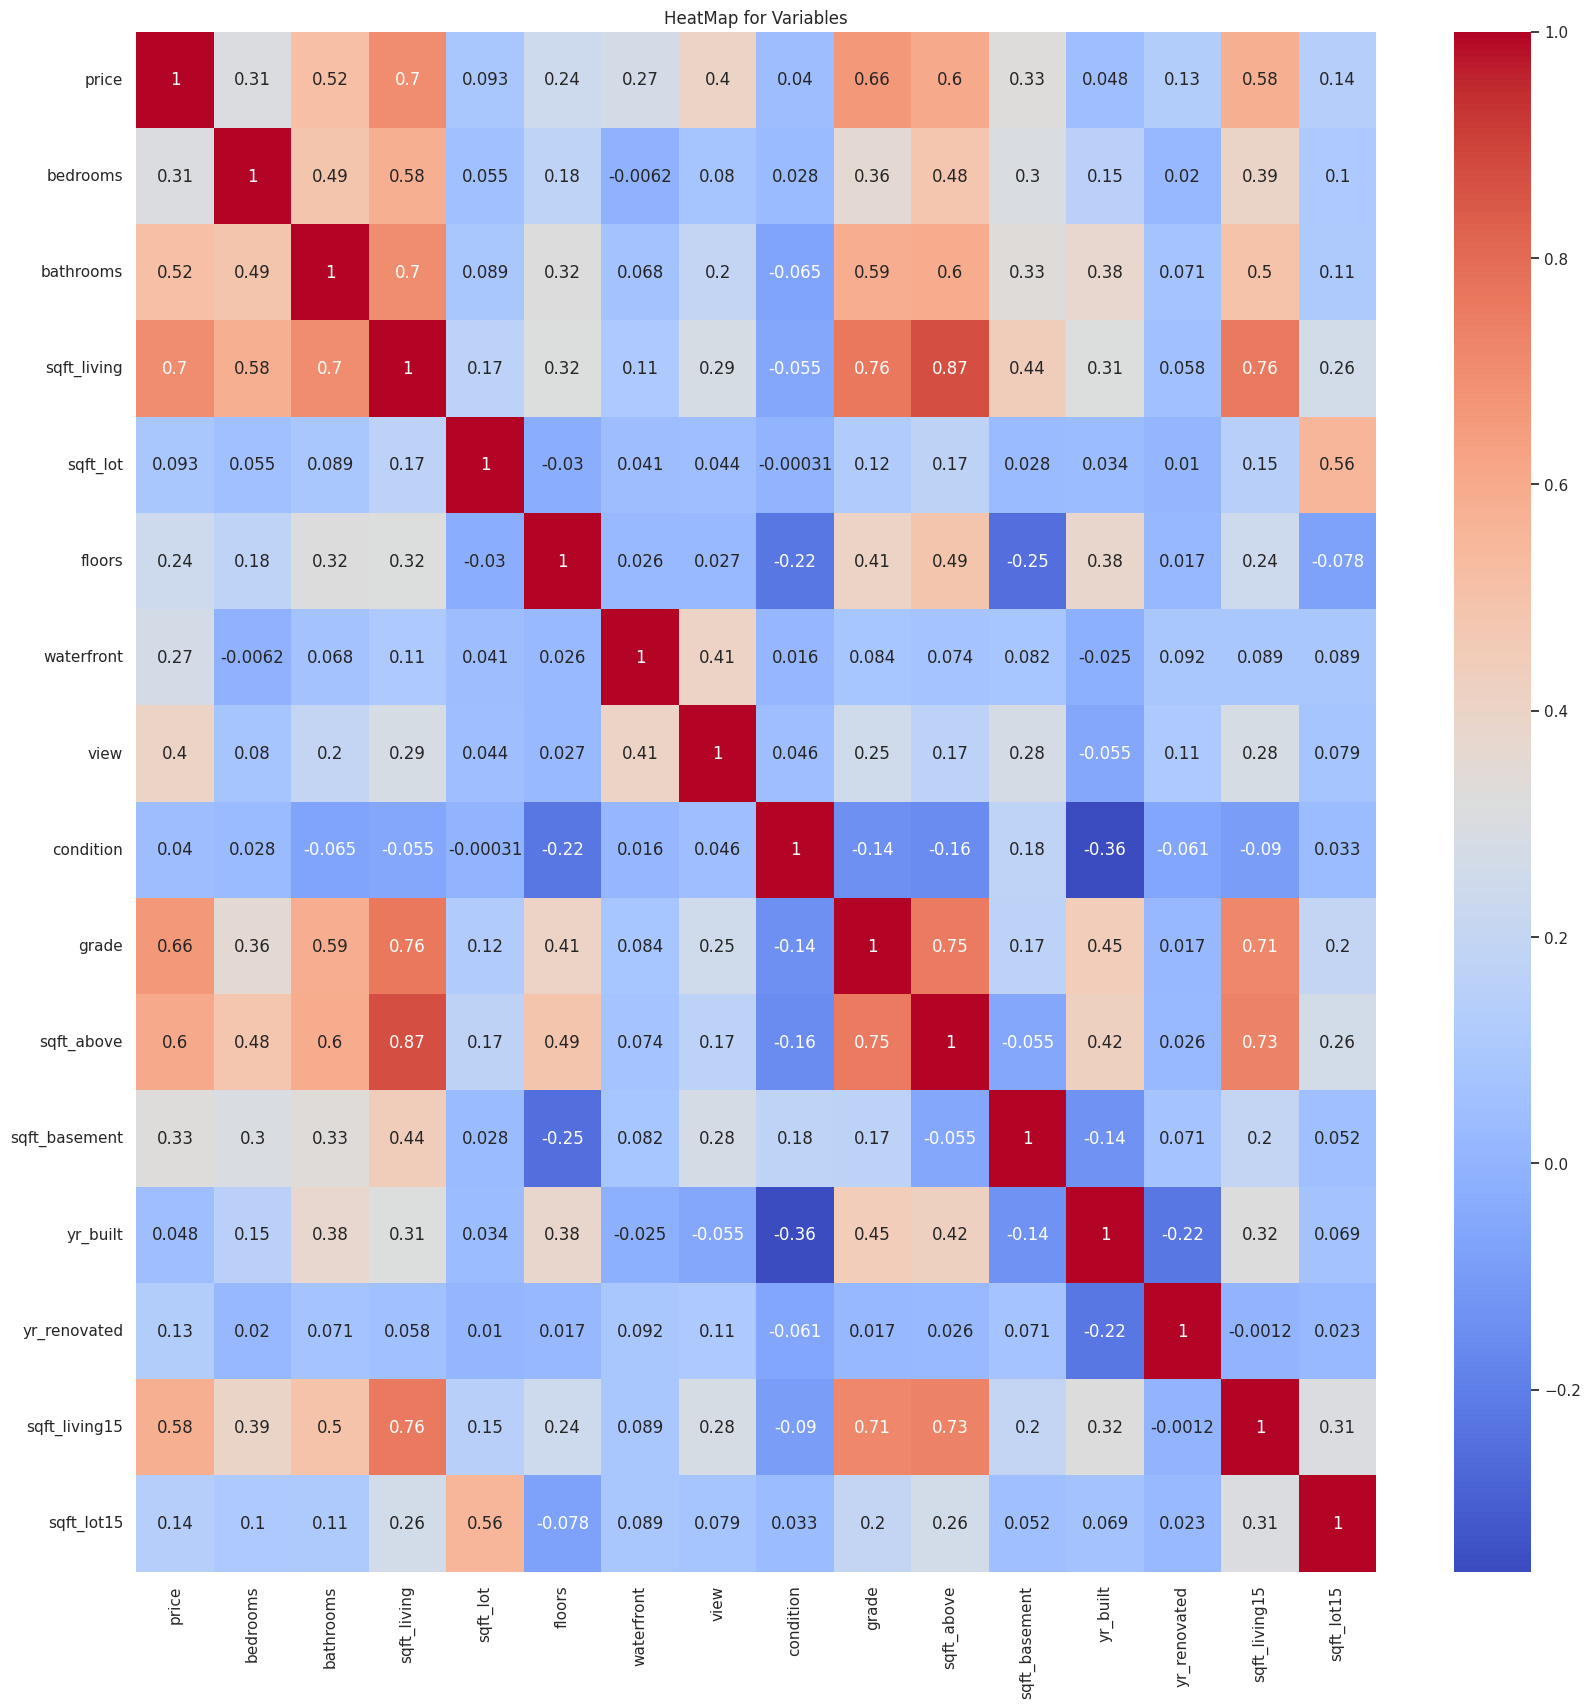

In [ ]:
# heatmap to view relationships between columns
plt.figure(figsize=(20,20))
sns.heatmap(df_numeric_z.corr(), annot = True, cmap='coolwarm')
plt.title('HeatMap for Variables')

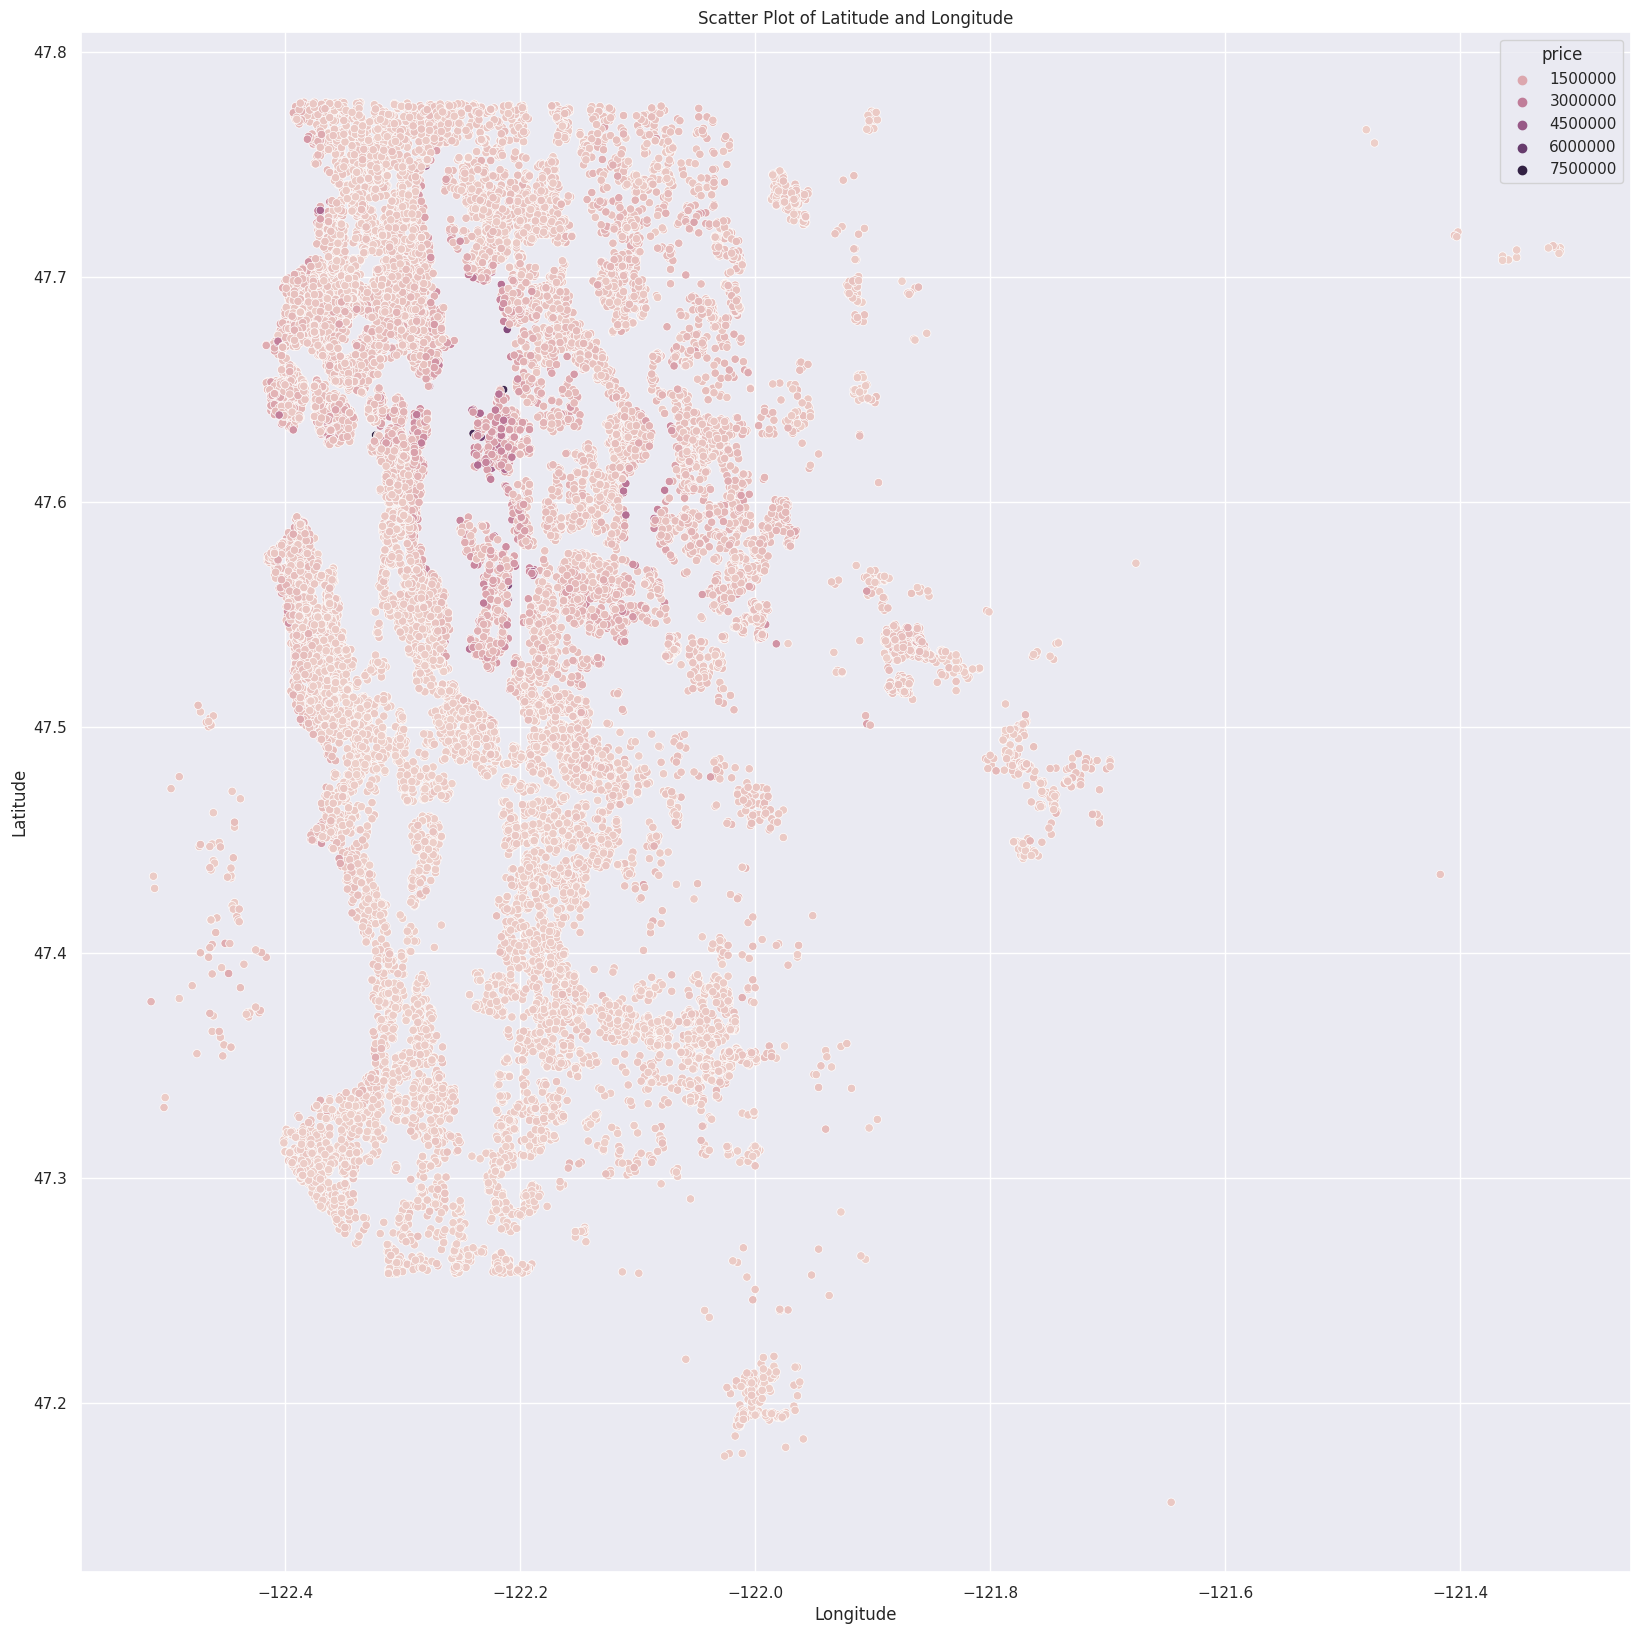

In [ ]:
# scatter plot to view relationship between location (lat and long) and price of the property
plt.figure(figsize=(20,20))
sns.scatterplot(data = df_z, x = df_z['long'], y = df_z['lat'], hue = df_z['price'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude')
plt.show()

### Feature Engineering

In [ ]:
from geopy import distance
lat_long = df_z['lat'].astype(str) + ',' + df_z['long'].astype(str)
lat_long = list(map(eval, lat_long))
Seattle = (47.6062, -122.3321)
miles = []
for i in lat_long:
    miles.append(round(distance.distance(i, Seattle).miles, 1))
df_z['distance'] = miles

<ipython-input-32-fc8e089edf50>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z['distance'] = miles


In [ ]:
df_z.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,7.4
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,8.0
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,10.2
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,6.6
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.4


In [ ]:
# take out unnecessary portion in the date column
df_z['year_sold'] = df.apply(lambda x: x.date[0:4], axis=1)

<ipython-input-34-c88e7156ba30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z['year_sold'] = df.apply(lambda x: x.date[0:4], axis=1)


In [ ]:
# create age column by subtracting date sold from year built
df_z['age'] = df.apply(lambda x: int(x.date[0:4]) - x.yr_built, axis=1)

<ipython-input-35-80d223a08ee9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z['age'] = df.apply(lambda x: int(x.date[0:4]) - x.yr_built, axis=1)


In [ ]:
# create age renovated column by subtracting date sold from renovation year
df_z['age_renovated'] = df_z.apply(
    lambda row: row.age if row.yr_renovated == 0 else int(
        row.date[0:4]) - row.yr_renovated, axis = 1)

<ipython-input-36-bef07c0c61f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z['age_renovated'] = df_z.apply(


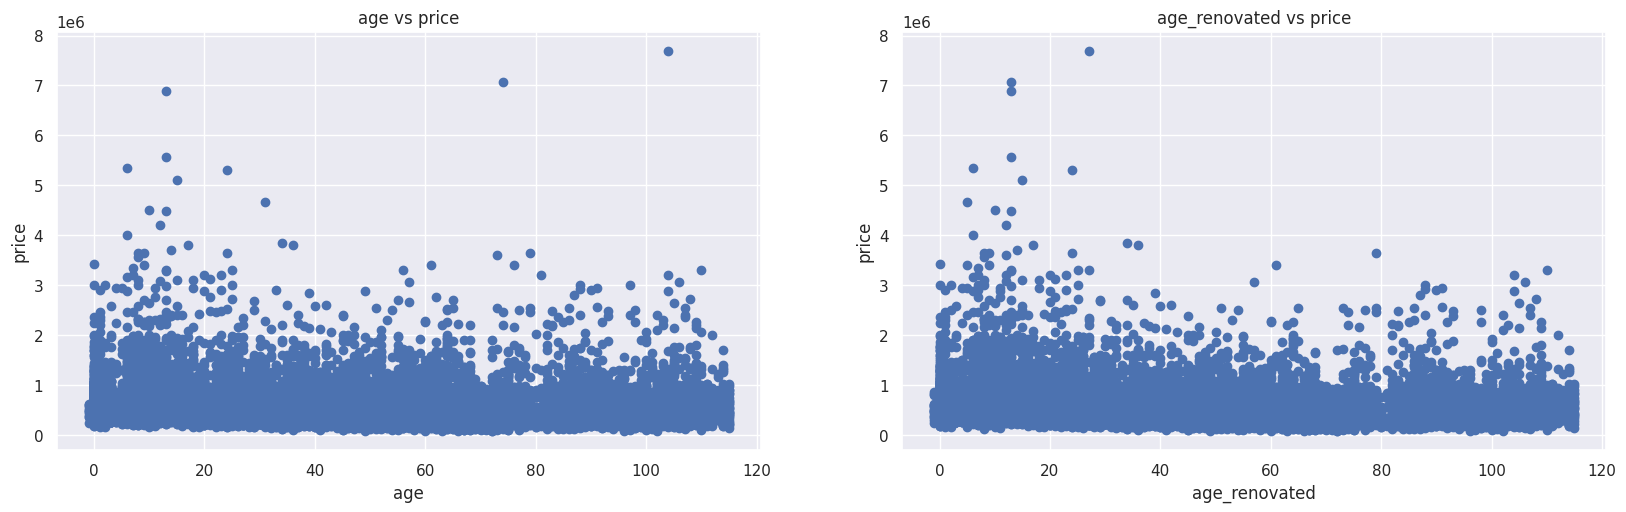

In [ ]:
# check out the relationship between our newly created features and the target variable
plt.figure(figsize=(20,25))
pairs('age', 1)
pairs('age_renovated', 2)

In [ ]:
# total sqaure footage
df_z['total_sqft'] = df_z['sqft_living'] + df_z['sqft_lot']

<ipython-input-38-d001e6175889>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z['total_sqft'] = df_z['sqft_living'] + df_z['sqft_lot']


In [ ]:
# create a new column to assigning renovations done a 1 and no renovations done a 0
df_z['renovation_done'] = df_z['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

<ipython-input-39-db0e4de150db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z['renovation_done'] = df_z['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)


In [ ]:
df_z.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,distance,year_sold,age,age_renovated,total_sqft,renovation_done
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1,0,0,...,47.5112,-122.257,1340,5650,7.4,2014,59,59,6830,0
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2,0,0,...,47.7210,-122.319,1690,7639,8.0,2014,63,23,9812,1
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1,0,0,...,47.7379,-122.233,2720,8062,10.2,2015,82,82,10770,0
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1,0,0,...,47.5208,-122.393,1360,5000,6.6,2014,49,49,6960,0
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1,0,0,...,47.6168,-122.045,1800,7503,13.4,2015,28,28,9760,0


## 2. Feature Selection


In [ ]:
# split data into independent(predictor) and dependent(target) variables
X = df_z.drop('price', axis=1)
y = df_z['price']

1. Univariate Selection
2. Recursive Feature Elimination


### Univariate Selection
Univariate selection chooses features based on their relationships with the dependent (target) variable. It utilizes statistics tests like Chi-Square, correlation coefficients and ANOVA to score and rank features. 

In [ ]:
# calculate pearson coefficients
correlation_scores = X.corrwith(y)
#sort correlation scores
sort_scores = correlation_scores.abs().sort_values()
sort_scores

<ipython-input-42-b778bdd523ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_scores = X.corrwith(y)


long               0.014039
id                 0.015183
condition          0.040022
age                0.048178
yr_built           0.048215
zipcode            0.051826
sqft_lot           0.093255
age_renovated      0.100947
total_sqft         0.116210
renovation_done    0.129202
yr_renovated       0.129547
sqft_lot15         0.141847
floors             0.241433
waterfront         0.269217
distance           0.299065
bedrooms           0.307339
lat                0.311285
sqft_basement      0.327539
view               0.403072
bathrooms          0.515440
sqft_living15      0.583589
sqft_above         0.601878
grade              0.664566
sqft_living        0.701508
dtype: float64

The features with the most correlation are ranked from bottom to the top.

In [ ]:
# remove id, zipcode, long and lat from the data set
df_y = df_z.drop(['id', 'date', 'zipcode', 'yr_built', 
           'yr_renovated', 'sqft_above',
          'sqft_lot15', 'condition', 'sqft_basement'
          ], axis=1)

In [ ]:
X = df_y.drop('price', axis=1)
y = df_y['price']

In [ ]:
df_y.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,lat,long,sqft_living15,distance,year_sold,age,age_renovated,total_sqft,renovation_done
0,221900.0,3,1,1180,5650,1,0,0,7,47.5112,-122.257,1340,7.4,2014,59,59,6830,0
1,538000.0,3,2,2570,7242,2,0,0,7,47.7210,-122.319,1690,8.0,2014,63,23,9812,1
2,180000.0,2,1,770,10000,1,0,0,6,47.7379,-122.233,2720,10.2,2015,82,82,10770,0
3,604000.0,4,3,1960,5000,1,0,0,7,47.5208,-122.393,1360,6.6,2014,49,49,6960,0
4,510000.0,3,2,1680,8080,1,0,0,8,47.6168,-122.045,1800,13.4,2015,28,28,9760,0


### Train Test Split

In [ ]:
# split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                       test_size= 0.3, random_state = 300)

### Feature Scaling

In [ ]:
# feature scaling with minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns.tolist())
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns.tolist())

In [ ]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,lat,long,sqft_living15,distance,year_sold,age,age_renovated,total_sqft,renovation_done
0,0.272727,0.250,0.229649,0.014417,0.333333,0.0,0.0,0.7,0.744732,0.234950,0.539823,0.088608,0.0,0.232759,0.232759,0.016368,0.0
1,0.272727,0.250,0.173950,0.011903,0.333333,0.0,0.0,0.6,0.655139,0.303512,0.437168,0.179325,1.0,0.267241,0.267241,0.013254,0.0
2,0.363636,0.125,0.087404,0.005792,0.000000,0.0,0.0,0.4,0.618144,0.178094,0.184071,0.088608,0.0,0.525862,0.525862,0.006216,0.0
3,0.363636,0.250,0.119109,0.006035,0.000000,0.0,0.0,0.4,0.906225,0.244983,0.233628,0.187764,0.0,0.370690,0.370690,0.006803,0.0
4,0.272727,0.250,0.148243,0.003986,0.000000,0.0,0.0,0.5,0.661251,0.161371,0.212389,0.046414,0.0,0.508621,0.508621,0.005074,0.0


## 3. Model Development and Evaluation

Regression model without hyperparameter fine-tuning, optimisation algorithm like Gradeient Descent or Regularisation techniques

In [ ]:
# linear model
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

y_hat = LR.predict(X_test)

In [ ]:
# print r2
from sklearn.metrics import r2_score
lin_reg = round(r2_score(y_hat , y_test),2)

In [ ]:
# print mse
from sklearn.metrics import mean_squared_error
mean_lin = round(mean_squared_error(y_test, y_hat),2)

In [ ]:
# Print the Intercept:
print('intercept:', LR.intercept_)

# Print the Slope:
print('slope:', LR.coef_) 

intercept: -272443.0443164472
slope: [-401066.50739382  285018.27780242 2160471.68902041   28807.87194943
  -11802.18809169  579573.01998492  182717.98287274  900988.40697253
   97186.13749161  408723.34079154  136296.33351054 -812079.58799418
   29198.67780217  169126.54364521   63367.37331436   52188.98646859
   66542.25770814]


Text(0, 0.5, 'Predicted')

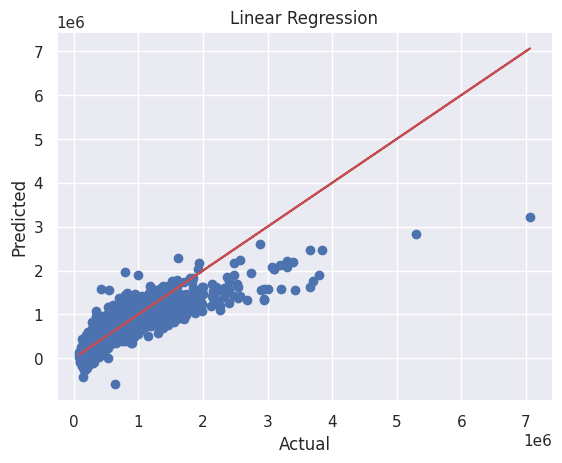

In [ ]:
# predicted vs actual comparison
fig = plt.figure()
plt.scatter(y_test,y_hat)
plt.plot(y_test,y_test,'r')
plt.title('Linear Regression')
plt.xlabel('Actual')                       
plt.ylabel('Predicted')  

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 5
    height = 5
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)

    plt.show()

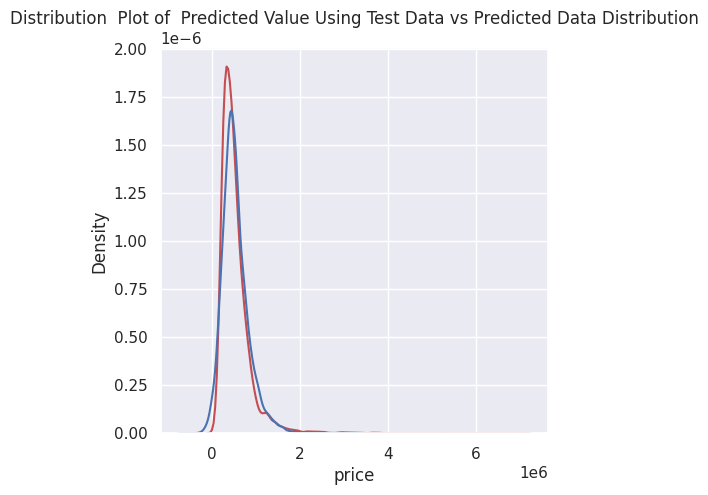

In [ ]:
# predicted vs actual comparison# predicted vs actual comparison
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Predicted Data Distribution'
DistributionPlot(y_test, y_hat, "Actual Values (Train)", "Predicted Values (Train)", Title)

### Gradient Descent

In [ ]:
# apply stochastic gradient descent to the model
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01)
sgd.fit(X_train, y_train)
sgd.score(X_train, y_train)
sgd.score(X_test, y_test)
y_pred_sgd = sgd.predict(X_test)

In [ ]:
# print r2
sto_grad = round(r2_score(y_pred_sgd , y_test),2)

In [ ]:
# print mse
mean_sto =round(mean_squared_error(y_test, y_pred_sgd),2)

Text(0, 0.5, 'Predicted')

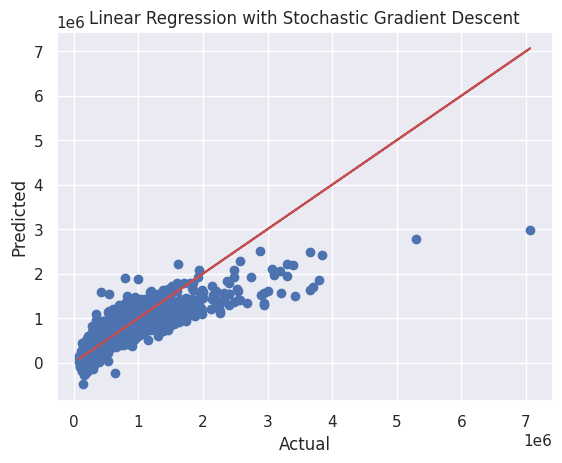

In [ ]:
# predicted vs actual comparison
fig = plt.figure()
plt.scatter(y_test, y_pred_sgd)
plt.plot(y_test,y_test,'r')
plt.title('Linear Regression with Stochastic Gradient Descent')
plt.xlabel('Actual')                       
plt.ylabel('Predicted')  

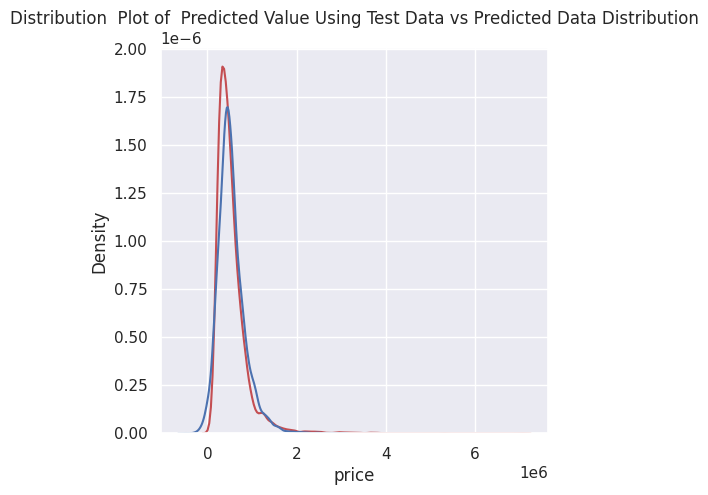

In [ ]:
# predicted vs actual comparison
DistributionPlot(y_test, y_pred_sgd, "Actual Values (Train)", "Predicted Values (Train)", Title)

### Regularisation

In [ ]:
# apply stochastic gradient descent with L1 (Lasso) Regularisation
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l1', eta0=0.01)
sgd.fit(X_train, y_train)
sgd.score(X_train, y_train)
sgd.score(X_test, y_test)
y_pred_sgd_lasso = sgd.predict(X_test)

In [ ]:
#print r2
sto_grad_lasso = round(r2_score(y_pred_sgd_lasso , y_test),2)

In [ ]:
# print mse
mean_sto_lasso = round(mean_squared_error(y_test, y_pred_sgd_lasso),2)

Text(0, 0.5, 'Predicted')

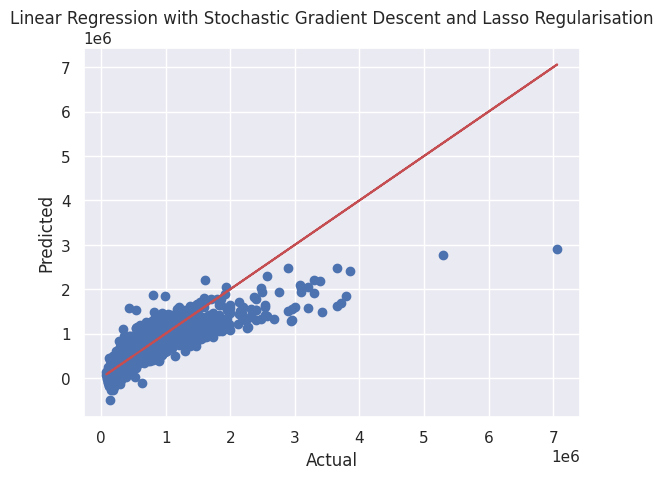

In [ ]:
# predicted vs actual comparison
fig = plt.figure()
plt.scatter(y_test, y_pred_sgd_lasso)
plt.plot(y_test,y_test,'r')
plt.title('Linear Regression with Stochastic Gradient Descent and Lasso Regularisation')
plt.xlabel('Actual')                       
plt.ylabel('Predicted')  

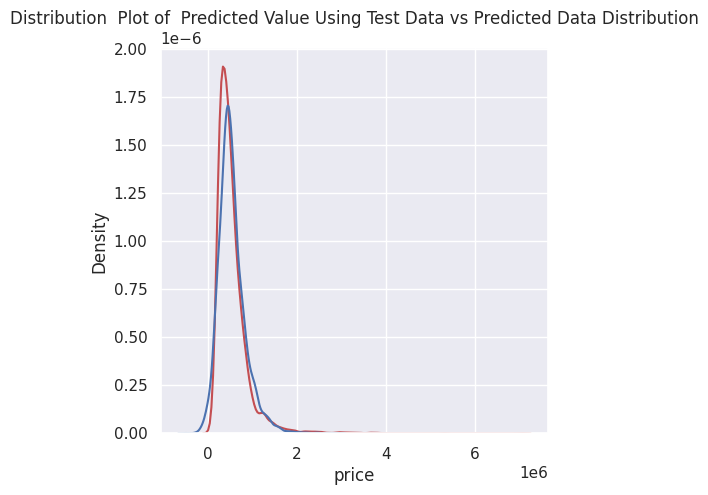

In [ ]:
# predicted vs actual comparison
DistributionPlot(y_test, y_pred_sgd_lasso, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [ ]:
# apply stochastic gradient descent with L2 (Ridge) Regularisation
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', eta0=0.01)
sgd.fit(X_train, y_train)
sgd.score(X_train, y_train)
sgd.score(X_test, y_test)
y_pred_sgd_ridge = sgd.predict(X_test)

In [ ]:
# print r2
sto_grad_ridge = round(r2_score(y_pred_sgd_ridge , y_test),2)

In [ ]:
# print mse
mean_sto_ridge = round(mean_squared_error(y_test, y_pred_sgd_ridge),2)

Text(0, 0.5, 'Predicted')

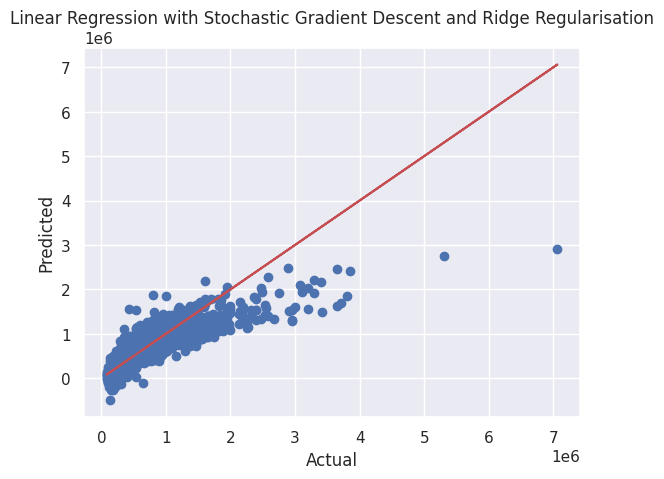

In [ ]:
# predicted vs actual comparison
fig = plt.figure()
plt.scatter(y_test,y_pred_sgd_ridge)
plt.plot(y_test,y_test,'r')
plt.title('Linear Regression with Stochastic Gradient Descent and Ridge Regularisation')
plt.xlabel('Actual')                       
plt.ylabel('Predicted')  

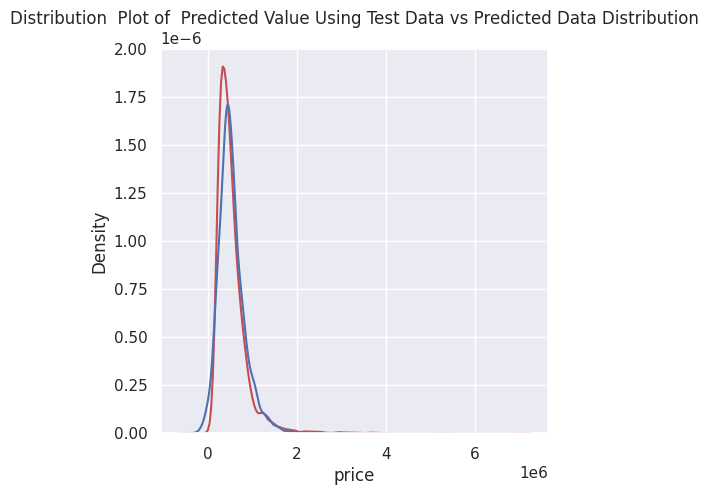

In [ ]:
# predicted vs actual comparison
DistributionPlot(y_test, y_pred_sgd_ridge, "Actual Values (Train)", "Predicted Values (Train)", Title)

### Polynomial Regression

In [ ]:
# Polynomial features are generated from input features 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
Input=[('polynomial', PolynomialFeatures(degree = 2, include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
y_hat_pol = pipe.predict(X_test)

In [ ]:
# print r2
pol_reg = round(r2_score(y_hat_pol , y_test),2)

In [ ]:
# print mse
mean_pol = round(mean_squared_error(y_test, y_hat_pol),2)

Text(0, 0.5, 'Predicted')

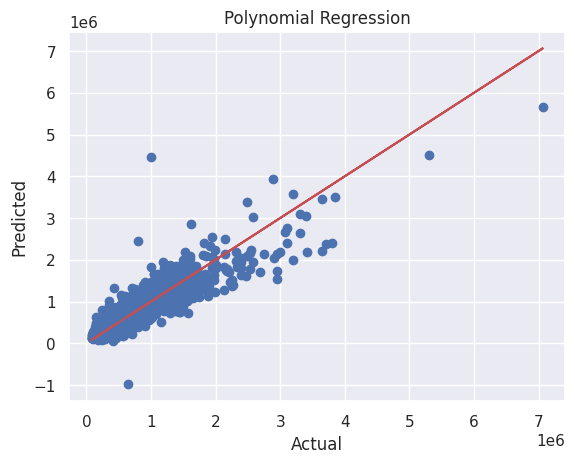

In [ ]:
# predicted vs actual comparison
fig = plt.figure()
plt.scatter(y_test,y_hat_pol)
plt.plot(y_test,y_test,'r')
plt.title('Polynomial Regression')
plt.xlabel('Actual')                       
plt.ylabel('Predicted')  

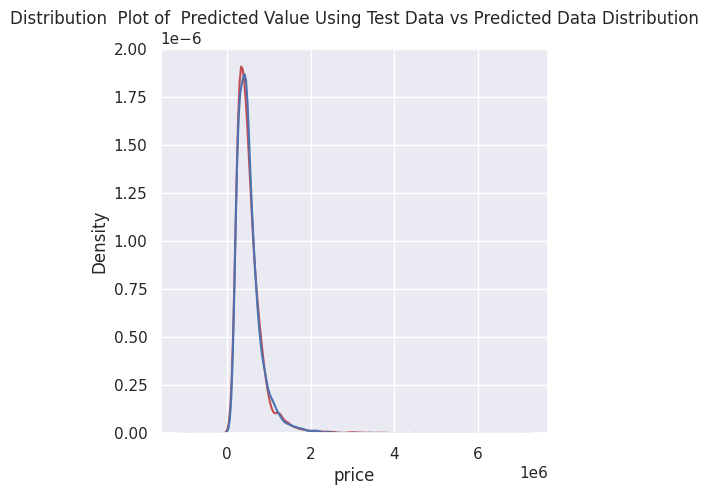

In [ ]:
# predicted vs actual comparison
DistributionPlot(y_test, y_hat_pol, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Stochastic Gradient Descent', 'Stochastic Gradient Descent with L1', 'Stochastic Gradient Descent with L2', 'Polynomial Regression'],
    'Score': [lin_reg, sto_grad, sto_grad_lasso, sto_grad_ridge, pol_reg],
    'MSE': [mean_lin, mean_sto, mean_sto_lasso, mean_sto_ridge, mean_pol]})
models.sort_values(by='Score', ascending=False)

,Model,Score,MSE
4,Polynomial Regression,0.80,2.258492e+10
0,Linear Regression,0.61,3.740254e+10
1,Stochastic Gradient Descent,0.61,3.737858e+10
2,Stochastic Gradient Descent with L1,0.60,3.752080e+10
3,Stochastic Gradient Descent with L2,0.60,3.753847e+10
